# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Multi-Language Named Entity Recognition (NER) Analysis </div></b>


# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Loading the Dataset </div></b>

In this notebook, we'll perform Named Entity Recognition analysis using a multilingual approach. We'll start by loading and preparing our dataset.


Loads the XTREME PAN-X dataset for multiple languages (German, French, Italian, English)
Takes a specific fraction of data for each language
Shuffles and samples the data consistently
Creates a summary table showing the number of training examples per language

The XTREME dataset is commonly used for evaluating cross-lingual transfer learning models, making it ideal for our multilingual NER task.

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset
from collections import defaultdict
from datasets import DatasetDict


langs = ["de", "fr", "it", "en"]
fracs= [0.629, 0.229, 0.084, 0.059]

panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    for split in ds:
        panx_ch[lang][split] = (
            ds[split].shuffle(seed=0).select(range(int(frac*ds[split].num_rows))))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/590k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/588k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/837k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/932k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/459k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Let's take a look at the number of training examples of all datasets:

In [3]:
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs}, index=["number of training examples"])

,de,fr,it,en
number of training examples,12580,4580,1680,1180


# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Understanding the Dataset </div></b>



We are analyzing the German ("de") training data of the panx_ch dataset. By examining the first data element (train[0]), we will observe the structure and key-value pairs within the dataset. This will help us understand the data format and content.

We will also examine the features attributes to get a better understanding of the structure of each feature in this dataset.

Lastly, we will focus on the ner_tags feature, which contains labels for named entity recognition (NER). Understanding these tags and their corresponding entity types is crucial for training and evaluating our model effectively.


In [4]:
element = panx_ch["de"]["train"][0]

for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [5]:
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [6]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Data Preprocessing </div></b>


We preprocess the dataset to prepare it for training. First, we define a helper function, create_tag_names, which converts integer NER tags into their corresponding string labels using tags.int2str(). This transformation will help us understand the tag types better.

Next, we apply create_tag_names to the German ("de") portion of the dataset, resulting in a new dataset, panx_de, which includes both tokens and their string-format NER tags. By displaying an example with pd.DataFrame, we can see the tokens and their associated tags.

Finally, using Counter, we calculate the frequency of each named entity tag type (e.g., person, organization) across different data splits (train, validation, test). We focus only on tags starting with "B" to count each entity type distinctly. The results are organized into a DataFrame for easy interpretation.

In [7]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]], ["Tokens", "Tags"])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [8]:
from collections import Counter

split2freqs = defaultdict(Counter)

for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] +=1

pd.DataFrame.from_dict(split2freqs, orient = "index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Bert Tokenizer vs XLM-R Tokenizer </div></b>

We compare the BERT and XLM-R tokenizers by observing how each tokenizer processes the same input text. We start by loading both tokenizers: bert-base-cased for BERT and xlm-roberta-base for XLM-R. The input text we use for this demonstration is "Tim Sparrow lives in San Diego!".

Tokenization: We first tokenize the text using both bert_tokenizer and xlmr_tokenizer to analyze the differences in how they split words into tokens.

Model Preparation:

For the XLM-R model, we load XLMRobertaForTokenClassification and set it up for Named Entity Recognition (NER) by configuring the id2label and label2id mappings. This allows us to correctly map predictions to NER labels.
The model is moved to the GPU if available.
Encoding and Prediction:

The xlmr_tokenizer encodes the text to numerical IDs for input to the model. The input_ids are then passed through the XLM-R model, which outputs logits representing predictions for each token.
We determine the predicted labels for each token by finding the index with the highest score (using torch.argmax) for each token position.
Result Comparison:

Finally, we create a DataFrame to display both BERT and XLM-R tokens, alongside predictions from the XLM-R model. This lets us observe tokenization differences and check how each model might process similar text inputs for NER tasks.


In [9]:
from transformers import AutoTokenizer

bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
xlmr_tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [10]:
text = "Tim Sparrow lives San Diego!"

bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

pd.DataFrame([bert_tokens, xlmr_tokens], index = ["BERT","XLM-R"])

,0,1,2,3,4,5,6,7,8
BERT,[CLS],Tim,Spa,##rrow,lives,San,Diego,!,[SEP]
XLM-R,<s>,▁Tim,▁Spar,row,▁lives,▁San,▁Diego,!,</s>


In [11]:
from transformers import XLMRobertaForTokenClassification
import torch

xlmr_model_name = "xlm-roberta-base"
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}
num_labels = tags.num_classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

xlmr_model = XLMRobertaForTokenClassification.from_pretrained(
    xlmr_model_name,
    num_labels = num_labels,
    id2label=index2tag,
    label2id=tag2index
).to(device)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
input_ids = xlmr_tokenizer.encode(text, return_tensors = "pt")

pd.DataFrame([xlmr_tokens, input_ids[0].numpy()],  index = ["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8
Tokens,<s>,▁Tim,▁Spar,row,▁lives,▁San,▁Diego,!,</s>
Input IDs,0,13320,37456,15555,60742,1735,59826,38,2


In [13]:
outputs = xlmr_model(input_ids.to(device)).logits

predictions = torch.argmax(outputs, dim=-1)

preds = [tags.names[p] for p in predictions[0].cpu().numpy()]

pd.DataFrame( [xlmr_tokens, preds], index = ["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8
Tokens,<s>,▁Tim,▁Spar,row,▁lives,▁San,▁Diego,!,</s>
Tags,I-ORG,I-ORG,B-PER,I-ORG,B-PER,I-ORG,I-ORG,I-ORG,I-ORG


In [14]:
def tag_text(text, tags, model, tokenizer):
    tokens = tokenizer(text).tokens()
    input_ids = xlmr_tokenizer.encode(
        text, return_tensors = "pt").to(device)
    outputs = model(input_ids)[0]
    predictions = torch.argmax(outputs, dim=2)
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index = ["Tokens", "Tags"])

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Tokenizer for NER Analysis </div></b>

We tokenize words and align their labels to make Named Entity Recognition (NER) training more accurate. We use the XLM-R tokenizer to split tokens while aligning token labels, a crucial step for correctly training models on token-level NER tasks.

Tokenization Setup: We begin by extracting words and NER labels from a German example (de_example). Then, the xlmr_tokenizer is applied with is_split_into_words=True to retain word boundaries in tokenization.

Word ID Mapping:

After tokenization, each token receives a word ID which maps it to its original word. This helps maintain alignment between words and their corresponding NER tags.
The word IDs list is examined to check if tokens align with their original words.
Label Alignment:

For each word ID, we assign the corresponding NER label from the original words to the token.
We handle special tokens by assigning -100 to prevent them from affecting the model's training. This ensures that subword tokens or special tokens don’t receive an NER tag.
Finally, the labels are converted to human-readable tags (e.g., “O,” “B-PER”) for easy interpretation.
Function to Tokenize and Align:

The tokenize_and_align_labels function encapsulates the steps of tokenizing words and aligning labels, preparing data for batch training by adding a “labels” field.
encode_panx_dataset applies this function to an entire dataset, returning a fully tokenized and label-aligned version of the data.


In [15]:
words, labels = de_example["tokens"], de_example["ner_tags"]

pd.DataFrame([words, labels], index = ["words", "labels"])

,0,1,2,3,4,5,6,7,8,9,10,11
words,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
labels,0,0,0,0,5,6,0,0,5,5,6,0


In [16]:
tokenized_input = xlmr_tokenizer(de_example["tokens"],is_split_into_words=True)

tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

pd.DataFrame([tokens], index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [17]:
word_ids = tokenized_input.word_ids()

pd.DataFrame([tokens, word_ids], index = ["Tokens","Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [18]:
previous_word_idx = None
label_ids = []
for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]

index = ["Tokens", "Word IDs", "Label IDs", "Labels"]
pd.DataFrame([tokens, word_ids, label_ids, labels], index = index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [19]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"],
                                     truncation = True,
                                     is_split_into_words = True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [20]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels,
                     batched=True,
                     remove_columns=["langs", "ner_tags", "tokens"])

panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Model Metrics </div></b>

To assess our model's performance in Named Entity Recognition (NER), we calculate classification metrics, particularly precision, recall, and F1-score for each entity class. We use the seqeval library for these evaluations.

Installing Seqeval:

Seqeval is a library specialized for sequence-based evaluations, which makes it ideal for NER tasks.
We use !pip install -q seqeval, where the -q flag minimizes the output to reduce clutter in the notebook.
Calculating Metrics:

We start by defining true labels (y_true) and predicted labels (y_pred) as example data.
The classification_report function from seqeval.metrics calculates metrics per class (e.g., "PER" for person entities) and gives precision, recall, and F1-score, helping us understand our model’s accuracy in identifying each entity.
Aligning Predictions:

In a batch of predictions, certain tokens are ignored (e.g., subwords) by assigning them a label ID of -100. This step ensures that only relevant tokens contribute to our metrics.
The function align_predictions aligns our predictions to their correct labels, ignoring tokens with -100.
The function outputs lists of labels and predictions that we can pass to classification_report for comprehensive metrics.

In [21]:
!pip install -q seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [22]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [23]:
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []
    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Model Training </div></b>

This section covers setting up and training a Named Entity Recognition (NER) model using a pre-trained XLM-Roberta model. Key steps include defining training arguments, initializing the trainer, and monitoring the model's performance.

Training Arguments:

Using TrainingArguments, we configure the model training. Important parameters include:
num_train_epochs: Defines the number of training epochs.
batch_size: Controls the number of samples processed before model updates. Here, it's set to 24.
logging_steps: Frequency of logging steps is calculated based on the dataset size.
output_dir: The directory where the model checkpoints will be saved.
evaluation_strategy: Specifies when to evaluate the model (set to "epoch" to evaluate after each epoch).
weight_decay: Regularization term to prevent overfitting.
push_to_hub: Enables saving the model to Hugging Face Hub.
Model Authentication:

notebook_login(): Authenticates our environment with the Hugging Face Hub, allowing us to save the model directly to the Hub after training.
Metrics Computation:

The function compute_metrics uses f1_score from seqeval to calculate F1 score, a key metric for NER tasks.
Data Collation:

DataCollatorForTokenClassification dynamically batches tokenized inputs and applies padding, optimizing memory usage during training.
Model Initialization:

We define model_init to initialize the XLM-Roberta model, compatible with the Trainer setup.
Training the Model:

Using the Trainer class, we configure and start the model training.
Parameters include the training and validation datasets (train_dataset and eval_dataset), tokenizer, and compute metrics function.
trainer.train(): Trains the model on the training dataset.
trainer.push_to_hub(commit_message="Training completed!"): Saves the model to the Hugging Face Hub after training.
Testing with Example Text:

We test the trained model on a sample German sentence (text_de) to identify named entities in the text using tag_text.

In [24]:
from transformers import TrainingArguments

num_epochs= 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = "multilingual-xlm-roberta-for-ner"

training_args = TrainingArguments(
    output_dir = model_name,
    log_level = "error",
    num_train_epochs = num_epochs,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    evaluation_strategy = "epoch",
    save_steps = 1e6,
    weight_decay = 0.01,
    logging_steps = logging_steps,
    report_to= "none",
    push_to_hub = True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
from huggingface_hub import notebook_login

notebook_login()

In [26]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(
                        eval_pred.predictions, eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

In [27]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [28]:
def model_init():
    return xlmr_model

In [29]:
from transformers import Trainer

trainer = Trainer(
    model_init = model_init,
    args = training_args,
    data_collator = data_collator,
    compute_metrics = compute_metrics,
    train_dataset = panx_de_encoded["train"],
    eval_dataset = panx_de_encoded["validation"],
    tokenizer = xlmr_tokenizer,
)

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.255700,0.154236,0.825370
2,0.127500,0.136151,0.848574
3,0.078600,0.136689,0.864807


CommitInfo(commit_url='https://huggingface.co/RidaDogrul/multilingual-xlm-roberta-for-ner/commit/7a7eb63df2dace0231698fbe9fbe16d0a2731bf4', commit_message='Training completed!', commit_description='', oid='7a7eb63df2dace0231698fbe9fbe16d0a2731bf4', pr_url=None, pr_revision=None, pr_num=None)

In [30]:
text_de = "tim Dean ist ein Informatiker bei Google in Kalifornien"

tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁tim,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Cross-Lingual Transfer</div></b>

This section evaluates how well a model trained on one language (German in this case) performs on other languages (French, Italian, and English) through cross-lingual transfer learning. The model, originally trained on the German dataset, is tested on other languages to assess its ability to generalize across languages.

F1 Score Calculation:

The get_f1_score function calculates the F1 score on a given dataset by using the trainer.predict() method, which returns predictions for the test set. The F1 score is then extracted from the prediction metrics.

Evaluating the German Model on German Dataset:

Initially, the F1 score of the German-trained model is calculated on the German test dataset (panx_de_encoded["test"]).

Testing the German Model on Other Languages:

The function evaluate_lang_performance is created to evaluate the performance of the German model on other languages. This function encodes the dataset of the target language (French, Italian, English) and calculates the F1 score.
French Dataset:
The German model is tested on the French dataset (panx_ch["fr"]), and the F1 score is stored.

Italian Dataset:
Similarly, the German model is tested on the Italian dataset.

English Dataset:
Lastly, the German model is tested on the English dataset.

Testing on Example Text:

After evaluating the model's performance across multiple languages, we test the German-trained model on a French sentence (text_fr), expecting it to tag named entities even in the unseen language.



In [31]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

In [32]:
f1_scores = defaultdict(dict)

In [33]:
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

F1-score of [de] model on [de] dataset: 0.866


In [34]:
text_fr = "Tim Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags , trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Tim,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [35]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

In [36]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

F1-score of [de] model on [fr] dataset: 0.706


In [37]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

F1-score of [de] model on [it] dataset: 0.687


In [38]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score of [de] model on [en] dataset: 0.601


# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Zero-Shot Model vs Fine-Tuned Model</div></b>

This section compares the performance of a zero-shot model and a fine-tuned model. A zero-shot model is one that has not been explicitly trained on the target task but is instead able to generalize to it by leveraging knowledge from a pre-trained model. On the other hand, a fine-tuned model is one that has been specifically trained on a subset of the target dataset, adjusting its parameters for optimal performance.

Training on a Subset of the Dataset: The function train_on_subset allows us to train the model on a subset of the training dataset and evaluate its performance. It takes two inputs: the dataset and the number of samples (num_samples) to be used for training. This allows for testing the effect of training with a small amount of data.

Training Subset: The function selects a subset of the dataset for training by shuffling it and choosing a specified number of samples.

Training and Evaluation on French Dataset:

Subset Sizes: We train on subsets with varying sizes, starting with 250 samples, and then gradually increasing to 500, 1000, 2000, and 4000 samples. The model’s performance on the test set is evaluated after training on each subset.
Metrics Collection: For each subset size, the train_on_subset function is called to train the model and compute the F1 score. The results are stored in a DataFrame (metrics_df).

This process allows us to assess how the model's performance improves as the training dataset size increases. The metrics_df DataFrame will show the F1 scores for different training subset sizes.

In [39]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size
    trainer = Trainer(
        model_init = model_init,
        args = training_args,
        data_collator = data_collator,
        compute_metrics = compute_metrics,
        train_dataset = train_ds,
        eval_dataset = valid_ds,
        tokenizer = xlmr_tokenizer,
    )
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub()
    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict(
                {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [40]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

training_args.push_to_hub= False

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [41]:
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Epoch,Training Loss,Validation Loss,F1
1,0.537300,0.370720,0.765436
2,0.307500,0.364336,0.789153
3,0.232500,0.376854,0.786017


,num_samples,f1_score
0,250,0.787849


In [42]:
for num_samples in [500, 1000, 2000, 4000]:
    metrics_df = metrics_df._append(train_on_subset(panx_fr_encoded, num_samples),
                                   ignore_index = True)

Epoch,Training Loss,Validation Loss,F1
1,0.284200,0.328460,0.798595
2,0.156700,0.347637,0.804464
3,0.088300,0.382428,0.816162


Epoch,Training Loss,Validation Loss,F1
1,0.262500,0.340700,0.810207
2,0.145700,0.324575,0.829669
3,0.092100,0.350389,0.831590


Epoch,Training Loss,Validation Loss,F1
1,0.223900,0.323489,0.807199
2,0.125900,0.331237,0.838764
3,0.077000,0.343990,0.841734


Epoch,Training Loss,Validation Loss,F1
1,0.219600,0.318069,0.837280
2,0.140100,0.316445,0.848240
3,0.087500,0.291033,0.861679


## Confusion Matrix

Zero-Shot Model Performance: Represented by the red dashed line, which remains constant. This line shows the F1 score of the model pre-trained on German (de) and evaluated on French (fr) without additional fine-tuning. The F1 score stays stable, indicating that the model’s zero-shot performance does not improve with increased data in French since it hasn't been fine-tuned on this language.

Fine-Tuned Model Performance: Represented by the blue line, which gradually rises as the number of French training samples increases. This trend indicates that the model's F1 score improves as it is fine-tuned on more French data. The increase, however, begins to plateau after a certain number of samples, suggesting that the model reaches a performance saturation point where additional data yields diminishing improvements.

This graph highlights the benefit of fine-tuning on target language data compared to relying solely on a zero-shot model.

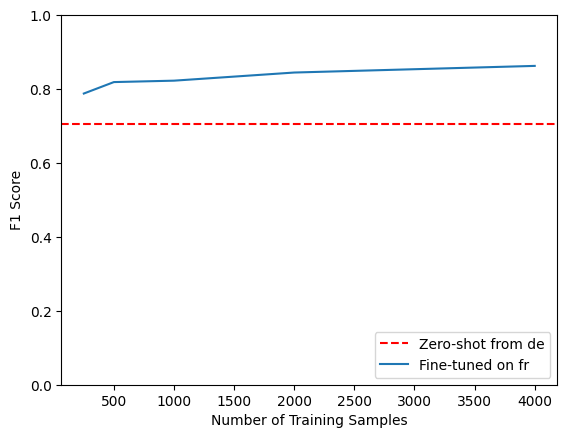

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axhline(f1_scores['de']['fr'], ls = "--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc = "lower right")
plt.ylim((0,1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()